In [2]:
#!wget https://raw.githubusercontent.com/M-Harrington/Instruction/master/corruption_dataset.csv

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('corruption_dataset.csv',index_col=0)
df.head()
#notice net migration has very different values than rest (large negative so need to be careful)

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11,NaN,NaN,2012,NaN,122.13,2.067825,2.000162e+10,NaN,NaN,...,82.6,448007.0,31161376.0,23.4,NaN,NaN,75.840,0.601426,7528588.0,8
Albania,36,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,NaN,45.670,14.215342,1575788.0,1
Algeria,36,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,NaN,NaN,...,26.1,-143268.0,37383887.0,5.0,101.450180,NaN,31.085,1.093393,25763106.0,4
Angola,15,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,NaN,NaN,...,105.8,87322.0,25107931.0,35.1,NaN,NaN,38.732,5.856513,15383127.0,5
Argentina,32,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,NaN,38027774.0,1


In [5]:
print(df.shape, "\n")

#Check data quality, Make sure that no NA's in y target
print(list(df.columns), "\n")
for col in list(df.columns):
    print("Number of NAs in ",col, "is " , df[col].isna().sum())

(162, 21) 

['CPI_2015', 'Risk_Dec_15', 'Risk_Nov_14', 'year', 'electric_percap', 'food_prod_index', 'percent_forest', 'gdp', 'income_bottom_20', 'literacy_male', 'literacy_female', 'childmort', 'net_migration', 'pop', 'undernourish', 'school_complete', 'researchers', 'rural_pop', 'total_debt', 'urban_pop', 'row_na'] 

Number of NAs in  CPI_2015 is  0
Number of NAs in  Risk_Dec_15 is  28
Number of NAs in  Risk_Nov_14 is  28
Number of NAs in  year is  0
Number of NAs in  electric_percap is  28
Number of NAs in  food_prod_index is  2
Number of NAs in  percent_forest is  2
Number of NAs in  gdp is  4
Number of NAs in  income_bottom_20 is  86
Number of NAs in  literacy_male is  121
Number of NAs in  literacy_female is  122
Number of NAs in  childmort is  0
Number of NAs in  net_migration is  0
Number of NAs in  pop is  1
Number of NAs in  undernourish is  15
Number of NAs in  school_complete is  47
Number of NAs in  researchers is  94
Number of NAs in  rural_pop is  1
Number of NAs in  tot

In [6]:
# make NAs machine-friendly
# optional: print(df['net_migration'].min())
df = df.fillna(-9999)

df.head() #Good to go

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11,-9999.0,-9999.0,2012,-9999.000000,122.13,2.067825,2.000162e+10,-9999.0,-9999.000000,...,82.6,448007.0,31161376.0,23.4,-9999.000000,-9999.00000,75.840,0.601426,7528588.0,8
Albania,36,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,-9999.00000,45.670,14.215342,1575788.0,1
Algeria,36,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,-9999.0,-9999.000000,...,26.1,-143268.0,37383887.0,5.0,101.450180,-9999.00000,31.085,1.093393,25763106.0,4
Angola,15,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,-9999.0,-9999.000000,...,105.8,87322.0,25107931.0,35.1,-9999.000000,-9999.00000,38.732,5.856513,15383127.0,5
Argentina,32,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,-9999.000000,38027774.0,1


Talk about the shape that sklearn likes (2d arrays and matricies):

In [7]:
X =  df.iloc[:,1:df.shape[1]]
y = df['CPI_2015']

## Training, predicting, Visualization

In [8]:
rfr1 = RandomForestRegressor(n_estimators=1, min_samples_leaf=7)
print(rfr1) #note defaults

rfr2 = RandomForestRegressor(n_estimators=1, min_samples_leaf=1)
print(rfr2) 

X_small= X['childmort'].values.reshape(-1, 1) #demonstrate why this is needed
rfr1.fit(X_small, y)
rfr2.fit(X_small, y)
print("Congrats on doing machine learning!")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Congrats on doing machine learning!


In [9]:
# Make Predictions:
X_test = np.arange(0.0, 140.0, 0.1)[:, np.newaxis]
y_pred = rfr1.predict(X_test)
y_pred2= rfr2.predict(X_test)

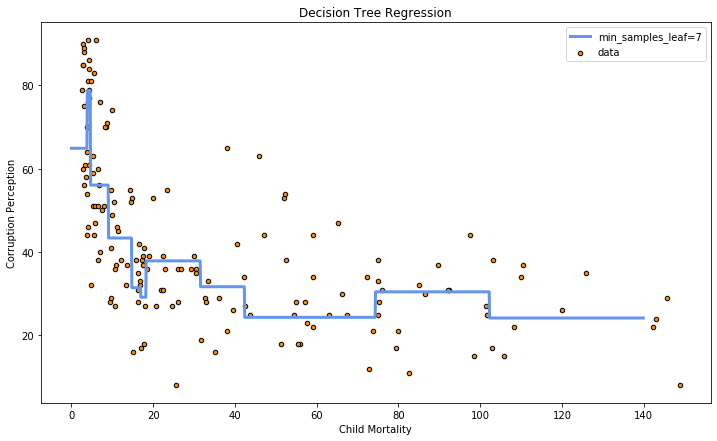

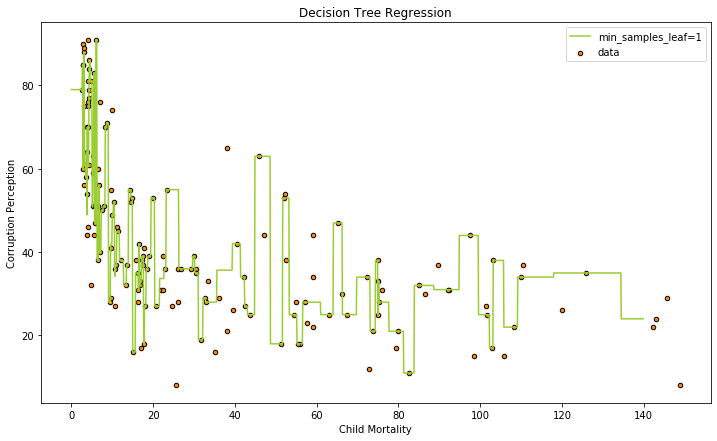

In [10]:
# Visualize the tree (No Overfitting)
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue",
         label="min_samples_leaf=7", linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Visualize the tree
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_pred2, color="yellowgreen", label="min_samples_leaf=1")
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


### Demonstrate RandomForest output

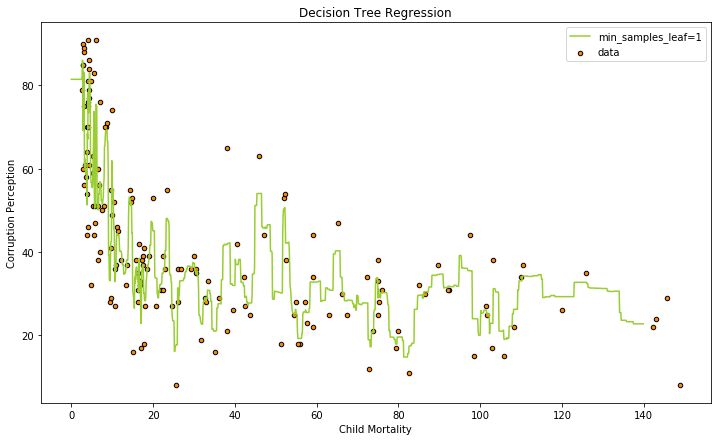

In [18]:
#Set Seed (global)
np.random.seed(123532)

#Now do n_estimators=100, min_samples_leaf=1
rfr3 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1,random_state=346234)
rfr3.fit(X_small, y)
y_pred3 = rfr3.predict(X_test)

# Plot
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_pred3, color="yellowgreen", label="min_samples_leaf=1")
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


## Cross Validation

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_small,y, test_size=0.25) #can play with different numbers here to demonstrate

print(X_train.shape)
print(X_test.shape)

(121, 1)
(41, 1)


In [37]:
rfr4 = RandomForestRegressor(n_estimators=100, min_samples_leaf=1,random_state=112)
rfr4.fit(X_train, y_train)

#Evaluate on training set to get MSE
y_model = rfr4.predict(X_train)
sq_dist = (y_model-y_train)**2  #Vectorized math through numpy
mse_train = sq_dist.sum()/X_train.shape[0]
print(mse_train)

#Evaluate on testing set to get MSE
y_model = rfr4.predict(X_test)
sq_dist = (y_model-y_test)**2  #Vectorized math through numpy
mse_test = sq_dist.sum()/X_test.shape[0]
print(mse_test)  #Hence overfitting problem


37.07333607018117
274.3662146245783


Make a note of the fact that after you've done the cross validation to pick the best paramater, when you go back to get your predictions, you should use the full model. I.e. train a model with the *same* parameters that you found in the original, then train with those parameters on the full dataset.  **This will be a different model than training with the same parameters on the smaller dataset**.

## Hyperparam Search

In [ ]:
min_samp= [3,6,10]
n_estimators = [2,6,14]

param_grid = 